## **SVR**

**Minimization Problem :**

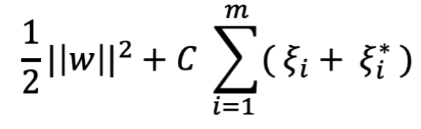

**Contraints :**

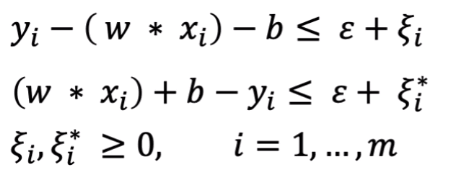

#### **Python Libraries**

In [14]:
import numpy as np
import pandas as pd 
from termcolor import colored
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

#### **Dataset**

In [2]:
hitters = pd.read_csv(r'C:\Users\AleynaCihangir\Desktop\MarketPlace PowerBrands Projects\Hitters.csv')
df = hitters.copy()
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [4]:
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### **Model**

In [5]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])
svr_model = SVR(kernel='linear').fit(X_train, y_train)
print(colored("\033[1m" + "Predicts: ", "blue"), svr_model.predict(X_train)[0:10], '\n') 
print(colored("\033[1m" + "y = {0} + {1} x ", "red").format(svr_model.intercept_[0], svr_model.coef_[0][0]))

Predicts:  [403.52804878 666.91219512 706.66829268 194.80853659 423.40609756
 666.91219512 150.08292683 304.13780488 507.88780488 815.99756098] 

y = -48.69756097561513 + 4.969512195122093 x 


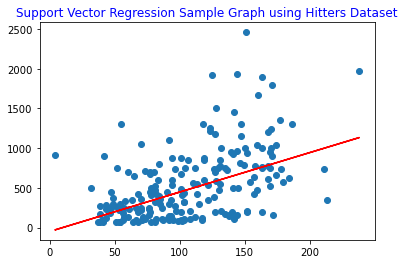

In [31]:
y_pred = svr_model.predict(X_train)
plt.scatter(X_train, y_train)

# X_train is DataFrame and y_pred is a list. If we dont write 'X_train['Hits'].tolist()', the code give us a TypeError. 

plt.plot(X_train['Hits'].tolist(), y_pred, color = "r");
plt.title(label="Support Vector Regression Sample Graph using Hitters Dataset", fontsize=12, color="blue");

In [32]:
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print(colored("\033[1m" + "y = {0} + {1} x ", "red").format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x 


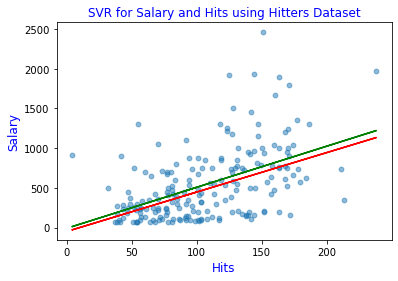

In [41]:
plt.scatter(X_train, y_train, alpha=0.5, s=23);
plt.plot(X_train['Hits'].tolist(), lm_pred, 'g')
plt.plot(X_train['Hits'].tolist(), y_pred, color='r')
plt.xlabel("Hits", fontsize=12, color="blue");
plt.ylabel("Salary", fontsize=12,color="blue" );
plt.title(label="SVR for Salary and Hits using Hitters Dataset", fontsize=12, color="blue");

#### **Predict**

In [49]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

#### **Model Tuning**

In [59]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)
pd.Series(svr_cv_model.best_params_)[0]
svr_tuned = SVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train) 
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

472.08434879974214

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

472.08434879974214